# Importing the Necessary Libraries

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageDraw

# Load and Display the Images

In [ ]:
def load_and_display_image(image_path):
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

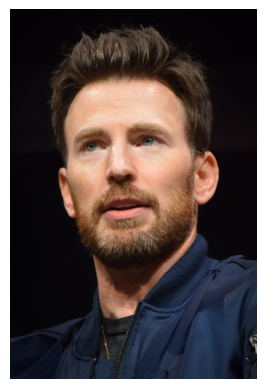

In [ ]:
input_image = '/content/ChrisEvans2023.jpg'
load_and_display_image(input_image)

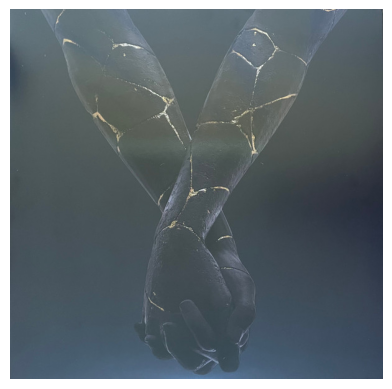

In [ ]:
watermark_image = '/content/R-27607926-1688747717-2029.jpg'
load_and_display_image(watermark_image)

# Function to Add a Transparent Image Watermark to the Original Image

In [ ]:
def add_image_watermark(input_image, watermark_image, output_image, transparency):
    original = Image.open(input_image)
    watermark = Image.open(watermark_image)

    watermark = watermark.resize(original.size)

    watermark = watermark.convert("RGBA")
    watermark_with_transparency = Image.new("RGBA", watermark.size)

    for x in range(watermark.width):
        for y in range(watermark.height):
            r, g, b, a = watermark.getpixel((x, y))
            watermark_with_transparency.putpixel((x, y), (r, g, b, int(a * transparency)))

    watermarked = Image.alpha_composite(original.convert("RGBA"), watermark_with_transparency)

    watermarked = watermarked.convert("RGB")
    watermarked.save(output_image, "JPEG")

#Applying Watermark

In [ ]:
output_image = '/content/watermarked_image.jpg'

transparency = 0.6

add_image_watermark(input_image, watermark_image, output_image, transparency)

#Displaying Images

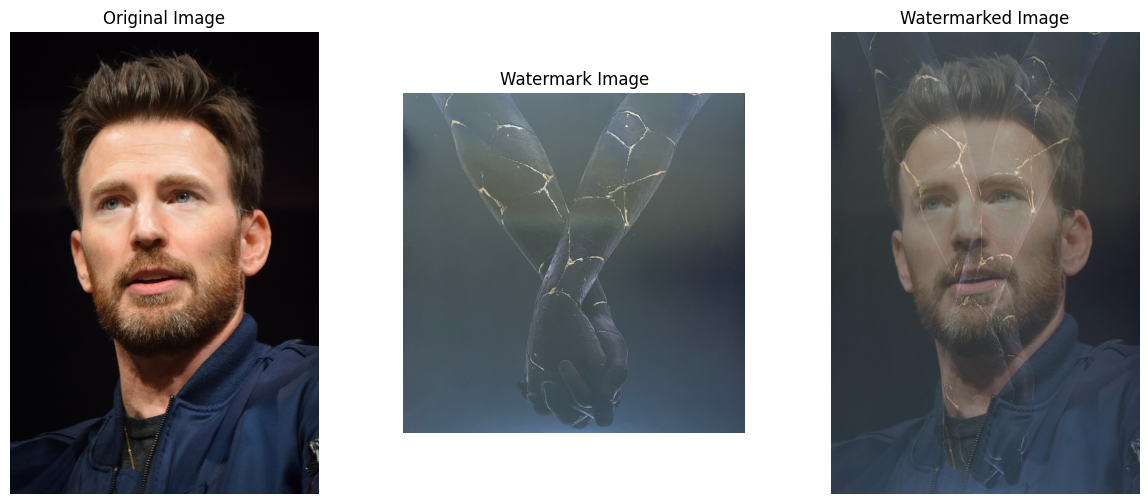

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6))

original_img = Image.open(input_image)
axs[0].imshow(original_img)
axs[0].axis('off')
axs[0].set_title("Original Image")

watermark_img = Image.open(watermark_image)
axs[1].imshow(watermark_img)
axs[1].axis('off')
axs[1].set_title("Watermark Image")

watermarked_img = Image.open(output_image)
axs[2].imshow(watermarked_img)
axs[2].axis('off')
axs[2].set_title("Watermarked Image")

plt.show()